In [18]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [3]:
import pandas as pd
import numpy as np
import scipy.stats

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
sns.set()

In [2]:
df = pd.read_csv('../data/raw/loans.csv')

In [22]:
df2 = pd.read_csv('../data/raw/loans_lenders.csv')

In [23]:
df2.shape

(1635741, 2)

In [24]:
df2['LENDERS'] = df2.LENDERS.str.split(", ")

In [25]:
df2.iloc[0][1]

['ron5108',
 'suzie7305',
 'derekconlon',
 'elaine3469',
 'pamela8247',
 'karen48556745',
 'claragrace7170',
 'john6330',
 'samuel1862',
 'annie81104665',
 'caroline8562',
 'caroline8562',
 'paulandkaren4338',
 'erin3748',
 'ryan8068',
 'carol4936',
 'nony5027',
 'bobharris',
 'bobharris']

In [84]:
df2_sample = df2.sample(n=10000)

In [85]:
# split list and create a new row for each entry
# https://stackoverflow.com/questions/27263805/pandas-when-cell-contents-are-lists-create-a-row-for-each-element-in-the-list

lender = df2_sample.LENDERS.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
lender.name = 'lender'


In [86]:
lender.describe()

count        195829
unique       104041
top       gooddogg1
freq           1296
Name: lender, dtype: object

(array([1.635347e+06, 2.330000e+02, 6.100000e+01, 3.000000e+01,
        4.600000e+01, 1.100000e+01, 0.000000e+00, 2.000000e+00,
        6.000000e+00, 5.000000e+00]),
 array([1.0000e+00, 3.0230e+02, 6.0360e+02, 9.0490e+02, 1.2062e+03,
        1.5075e+03, 1.8088e+03, 2.1101e+03, 2.4114e+03, 2.7127e+03,
        3.0140e+03]),
 <a list of 10 Patch objects>)

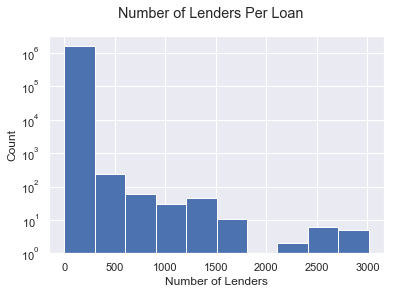

In [81]:
fig = plt.figure()
fig.suptitle('Number of Lenders Per Loan')
plt.xlabel("Number of Lenders")
plt.ylabel("Count")
plt.hist(df2.LENDERS.apply(len), log=True)

In [74]:
df2.LENDERS.apply(len).describe()

count    1.635741e+06
mean     1.976555e+01
std      2.595738e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.300000e+01
75%      2.400000e+01
max      3.014000e+03
Name: LENDERS, dtype: float64

In [87]:
sample = df2_sample

In [88]:
sample = sample.join(lender)

In [89]:
sample.shape

(195829, 3)

In [90]:
sample['LOAN_ID'].unique().shape

(10000,)

In [91]:
sample = sample.drop('LENDERS', axis=1)

In [92]:
# collapse same user for each loan (so if bobharris shows up twice, collapse that to one row with count 2)
data = sample.groupby(['LOAN_ID', 'lender']).size().reset_index()

In [93]:
data.shape

(190677, 3)

In [94]:
# rename some columns
data = data.rename(columns={"LOAN_ID": "loan_id", 0: "count"})

In [95]:
data['count'].describe()

count    190677.000000
mean          1.027020
std           0.311054
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          46.000000
Name: count, dtype: float64

In [98]:
reader = Reader(rating_scale=(0, data['count'].max()))
# The columns must correspond to user id, item id and ratings (in that order).
surprise_data = Dataset.load_from_df(data[['loan_id', 'lender', 'count']], reader)

In [99]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3590  0.2408  0.2694  0.3541  0.3087  0.3064  0.0463  
MAE (testset)     0.0836  0.0831  0.0842  0.0846  0.0842  0.0839  0.0005  
Fit time          9.23    9.42    8.97    9.18    9.16    9.19    0.14    
Test time         0.36    0.35    0.33    0.32    0.30    0.33    0.02    


{'test_rmse': array([0.35902654, 0.24083059, 0.26940269, 0.35413186, 0.30869676]),
 'test_mae': array([0.08355534, 0.08305066, 0.08422668, 0.08458248, 0.0842196 ]),
 'fit_time': (9.227293968200684,
  9.421902179718018,
  8.968926906585693,
  9.179816007614136,
  9.160969972610474),
 'test_time': (0.3575170040130615,
  0.34866905212402344,
  0.3297281265258789,
  0.31998276710510254,
  0.2952301502227783)}

In [44]:
data.describe()

,loan_id,count
count,81.000000,81.000000
mean,61064.777778,1.024691
std,50293.271140,0.156150
min,15246.000000,1.000000
25%,31727.000000,1.000000
50%,31727.000000,1.000000
75%,66852.000000,1.000000
max,152222.000000,2.000000


In [5]:
df.shape

(1682790, 34)

In [4]:
df_sample = df.sample(n=1000)

In [11]:
merged = pd.merge(df_sample, df2, on="LOAN_ID")

In [12]:
merged.shape

(985, 35)

In [13]:
merged.LENDERS.head(20)

0     judy7940, jarkko5246, carl2812, valerio2063, u...
1     esouthard, sherrilothridge, rasmus5629, susan1...
2     katrina4255, themissionbeltco, jaredfielding, ...
3     richard5036, eliasdebbas, karen6798, cedric911...
4     jennifer51145544, judith8117, matteo5275, DasJ...
5     dianne5227, damien4633, aaron83574977, john714...
6     david7063, gooddogg1, dps, nicholasluder, qu63...
7     don6118, anonymous2012, judith5696, eugene7557...
8     judith5696, judith5696, juergen8232, cristian5...
9           brad7205, susan8444, bette8303, william6536
10    nms, aaron83574977, robert7892, nicholasluder,...
11    hilde9827, michael11886657, andrea53594955, al...
12    htmnt6651, jo3270, stanley4950, christopher705...
13    samantha5889, charlieandpaula2066, rotaryclub5091
14    eugenie6716, veronica5786, rob2176, susie6128,...
15                                             mark8125
16    gooddogg1, intelsmallthingschal2081, aby3665, ...
17                                           and

In [16]:
merged.to_csv('./kiva_ds_csv/loan_lender_merged.csv')

In [14]:
merged['LENDERS_LIST'] = merged.LENDERS.str.split(', ')

In [16]:
merged.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,LENDERS,LENDERS_LIST
0,1574785,St. Leonard and St. Stephen School,English,James is administrator of St. Leonard and St. ...,James is administrator of St. Leonard and St. ...,875.0,875.0,funded,2906446.0,NaN,...,1,1,"#Biz Durable Asset, #Schooling, #Health and Sa...",St. Leonard and St. Stephen School,male,true,irregular,field_partner,"judy7940, jarkko5246, carl2812, valerio2063, u...","[judy7940, jarkko5246, carl2812, valerio2063, ..."
1,380208,Abdukarimjon,Russian,Абдукаримджон женат имеет двоих детей. Женат. ...,Abdukarimjon is married and has three children...,1600.0,1600.0,funded,979830.0,NaN,...,2,1,NaN,Abdukarimjon,male,true,monthly,field_partner,"esouthard, sherrilothridge, rasmus5629, susan1...","[esouthard, sherrilothridge, rasmus5629, susan..."
2,1067063,Roeun,English,Roeun is a 54-year-old married mother with fou...,Roeun is a 54-year-old married mother with fou...,1500.0,1500.0,funded,2177966.0,NaN,...,2,1,"#Elderly, #Parent, #Biz Durable Asset, #Woman ...",Roeun,male,true,monthly,field_partner,"katrina4255, themissionbeltco, jaredfielding, ...","[katrina4255, themissionbeltco, jaredfielding,..."
3,826998,Ref'at,English,Ref'at is a 32-year-old married man from Gaza ...,Ref'at is a 32-year-old married man from Gaza ...,2500.0,2500.0,funded,1791557.0,NaN,...,1,1,#Parent,Ref'at,male,true,monthly,field_partner,"richard5036, eliasdebbas, karen6798, cedric911...","[richard5036, eliasdebbas, karen6798, cedric91..."
4,1008224,Reem,English,Reem is a mother for six children living in Ra...,Reem is a mother for six children living in Ra...,1450.0,1450.0,funded,2077357.0,NaN,...,2,1,"volunteer_like, #First Loan, #Parent, #Refugee...",Reem,female,true,monthly,field_partner,"jennifer51145544, judith8117, matteo5275, DasJ...","[jennifer51145544, judith8117, matteo5275, Das..."


In [17]:
unique_lenders = set()
initialized = False

def add_to_set(list_str):
    unique_lenders.update(list_str.split(', '))

df2.LENDERS.apply(add_to_set)

0          None
1          None
2          None
3          None
4          None
5          None
6          None
7          None
8          None
9          None
10         None
11         None
12         None
13         None
14         None
15         None
16         None
17         None
18         None
19         None
20         None
21         None
22         None
23         None
24         None
25         None
26         None
27         None
28         None
29         None
           ... 
1635711    None
1635712    None
1635713    None
1635714    None
1635715    None
1635716    None
1635717    None
1635718    None
1635719    None
1635720    None
1635721    None
1635722    None
1635723    None
1635724    None
1635725    None
1635726    None
1635727    None
1635728    None
1635729    None
1635730    None
1635731    None
1635732    None
1635733    None
1635734    None
1635735    None
1635736    None
1635737    None
1635738    None
1635739    None
1635740    None
Name: LENDERS, Length: 1

In [32]:
df2.LOAN_ID.unique()

array([ 152222,   31727,   15246, ..., 1704997, 1712559, 1712284])

In [18]:
len(unique_lenders)

1499532

In [28]:
def generate_lender_idx_map():
    lender_to_idx = dict()
    idx = 0
    for lender in unique_lenders:
        lender_to_idx[lender] = idx
        idx += 1
    return lender_to_idx

In [33]:

def generate_loan_idx_map():
    loan_to_idx = dict()
    idx = 0
    for loan in df2.LOAN_ID.unique():
        loan_to_idx[loan] = idx
        idx += 1
    return loan_to_idx

In [29]:
lender_to_idx = generate_lender_idx_map()

In [34]:
loan_to_idx = generate_loan_idx_map()

In [35]:
len(loan_to_idx)

1635741

In [36]:
len(lender_to_idx)

1499532

In [55]:
# nxm matrix: rows are loans, cols are lenders
mat = np.zeros((len(loan_to_idx), len(lender_to_idx)))

In [56]:
mat.shape

(1635741, 1499532)

In [58]:
def insert_lenders(row):
    for lender in row[1].split(', '):
        mat[loan_to_idx[row[0]]][lender_to_idx[lender]] += 1

In [ ]:
df2.apply(insert_lenders, axis=1)